In [1]:
pwd

'C:\\Users\\ARPIT\\Desktop\\UC-14000'

### Importing the Packages

In [2]:
from numpy import *
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### importing the File for EDA

In [3]:
medals=pd.read_csv("C:\\Users\\ARPIT\\Desktop\\UC-14000\\medal.csv",sep=',',header=0, encoding="latin")
#country=pd.read_csv("C:\\Users\\ARPIT\\Desktop\\UC-14000\\country.csv",sep=',',header=0, encoding="latin")

### Knowing about Data 

In [4]:
#medal = pd.merge(medals,country,how='left',on='NOC')
medals.columns
medals.head()

,City,Edition,Sport,Discipline,Athlete,Gender,Event,Event_gender,Medal,NOC
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",Men,100m freestyle,M,Gold,HUN
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",Men,100m freestyle,M,Silver,AUT
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",Men,100m freestyle for sailors,M,Bronze,GRE
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",Men,100m freestyle for sailors,M,Gold,GRE
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",Men,100m freestyle for sailors,M,Silver,GRE


In [5]:
print(medals.shape)

(29216, 10)


**There are 29216 Rows and 10 Columns in our medals dataframe**

In [6]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   Gender        29216 non-null  object
 6   Event         29216 non-null  object
 7   Event_gender  29216 non-null  object
 8   Medal         29216 non-null  object
 9   NOC           29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


**From th above dataset info we can see there are no null Objects and we can know the data types of each columns which will be useful for doing further analysis.**

### Looking at the olympics unique figure held since 1986

In [7]:
print("Number of Nationalities : ",len(medals.NOC.unique()))
print("Number of Athlete : ",len(medals.Athlete.unique()))
print("Number of Edition : ",len(medals.Edition.unique()))
print("Number of Sport : ",len(medals.Sport.unique()))
print("Number of Discipline : ",len(medals.Discipline.unique()))
print("Number of Event : ",len(medals.Event.unique()))

Number of Nationalities :  138
Number of Athlete :  21413
Number of Edition :  26
Number of Sport :  42
Number of Discipline :  56
Number of Event :  577


### Viz 1 : Medals distribution won by Male and Female Participants along with Medal Type from Olympics (1896-2008)

In [8]:
pd.crosstab([medals.Gender],medals.Medal,margins=True).style.background_gradient(cmap='Wistia')

Medal,Bronze,Gold,Silver,All
Gender,,,,
Men,7175,7365,7181,21721
Women,2514,2485,2496,7495
All,9689,9850,9677,29216


### Viz 2 : Medals distribution won by Male and Female Participants along with Medal Type every year from Olympics (1896-2008)

In [9]:
pd.crosstab([medals.Gender,medals.Medal],medals.Edition,margins=True).style.background_gradient(cmap='viridis')

### Viz 3 : City and Participants every Olympics year held.

In [10]:
pd.crosstab([medals.City],medals.Edition,margins=True).style.background_gradient(cmap='magma')

Edition,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,All
City,,,,,,,,,,,,,,,,,,,,,,,,,,,
Amsterdam,0,0,0,0,0,0,0,710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,710
Antwerp,0,0,0,0,0,1298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1298
Athens,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1998,0,2149
Atlanta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1859,0,0,0,1859
Barcelona,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1705,0,0,0,0,1705
Beijing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2042,2042
Berlin,0,0,0,0,0,0,0,0,0,875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,875
Helsinki,0,0,0,0,0,0,0,0,0,0,0,889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,889
London,0,0,0,804,0,0,0,0,0,0,814,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1618


### Viz 4 : Introduction of New Sports in  Olympics (1896-2008)

In [11]:
k = medals[['Sport','Edition']]
k = k.groupby(['Sport']).min().sort_values('Edition',ascending=False)
k

,Edition
Sport,
Taekwondo,2000
Triathlon,2000
Softball,1996
Badminton,1992
Baseball,1992
Table Tennis,1988
Volleyball,1964
Judo,1964
Canoe / Kayak,1936


### Viz 5 : Count of Event_gender and Medal won in every Olympics (1896-2008)

In [12]:
pd.crosstab([medals.Event_gender,medals.Medal],medals.Edition,margins=True).style.background_gradient(cmap='plasma')

### Viz 6 : Country with medals win along with sport in which they have won in Olympics (1896-2008)

In [13]:
pd.crosstab([medals.NOC,medals.Sport],medals.Medal,margins=True).style.background_gradient(cmap='magma')

### Viz 7 : Countries with Highest Medal Counts in Olympics (1896-2008) (For All country stats look prev. code snippet)

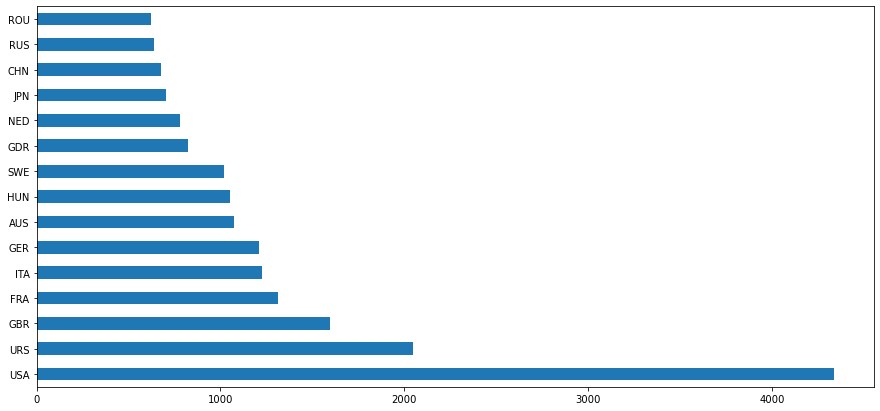

In [14]:
plt.figure().set_size_inches(15,7)
medals['NOC'].value_counts(ascending=False)[:15].plot(kind='barh',y='Medal_counts')

### Viz 8 : Countries with Least Medal Counts in Olympics (1896-2008)

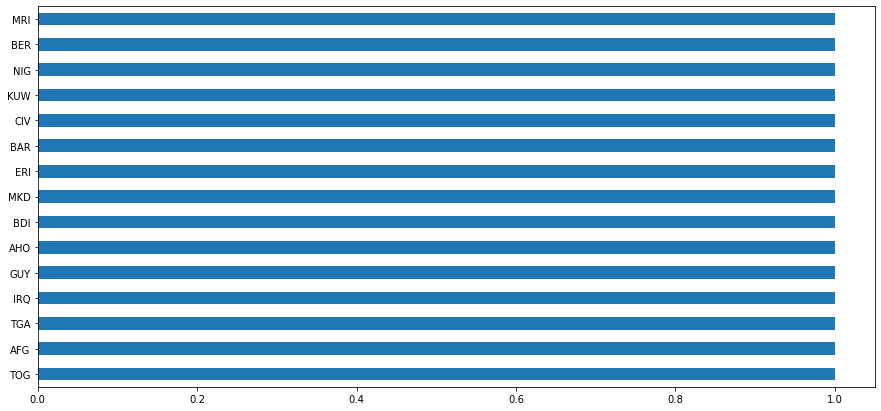

In [15]:
plt.figure().set_size_inches(15,7)
medals['NOC'].value_counts(ascending=True)[:15].plot(kind='barh',y='Medal_counts')

### Viz 9: Olympics Participants at every Olympics (1896-2008)

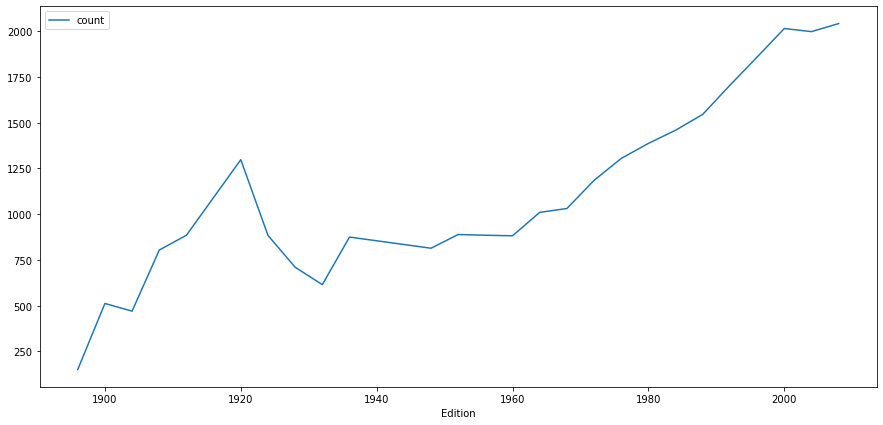

In [16]:
k =medals.groupby(medals['Edition'])['Event_gender'].agg(['count'])
k.plot(kind='line',secondary_y='Event_count',figsize=(15,7))

### Viz 10: India at Olympics (1896-2008)

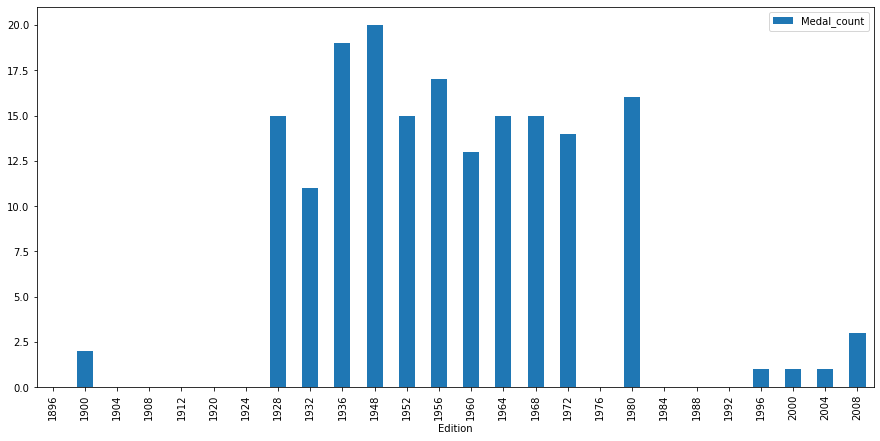

In [17]:
def f(x):
    return Series(dict(Medal_count = x['NOC'].apply(lambda x: (x=='IND')).sum()))  
k = medals.groupby(['Edition']).apply(f)
k.plot(kind='bar',figsize=(15,7))

### Most Medal Won by Country and Athlete Olympics(1896-2008)

In [18]:
medals[medals['Medal']=='Gold'].groupby(['NOC','Athlete','Discipline'])['Medal'].agg(['count']).sort_values("count",ascending = False).head(10)

count
NOC Athlete          Discipline        
USA PHELPS, Michael  Swimming        14
FIN NURMI, Paavo     Athletics        9
URS LATYNINA, Larisa Artistic G.      9
USA SPITZ, Mark      Swimming         9
    LEWIS, Carl      Athletics        9
    EWRY, Ray        Athletics        8
    THOMPSON, Jenny  Swimming         8
    BIONDI, Matthew  Swimming         8
JPN KATO, Sawao      Artistic G.      8
TCH CASLAVSKA, Vera  Artistic G.      7

### The Guy whose Gender is Male but has enrolled himelf in event as Female

In [19]:
medals.query('Gender == "Men" and Event_gender == "W"')

,City,Edition,Sport,Discipline,Athlete,Gender,Event,Event_gender,Medal,NOC
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",Men,marathon,W,Bronze,KEN


### Viz 11 : Sports which has Max. No. of Participants 

In [20]:
medals.Event.value_counts().reset_index(name='Medal')### Showing the maximum medals won by sport
pd.crosstab([medals.Sport],medals.Medal,margins=True).style.background_gradient(cmap='plasma')

Medal,Bronze,Gold,Silver,All
Sport,,,,
Aquatics,1256,1302,1270,3828
Archery,82,118,105,305
Athletics,1137,1151,1160,3448
Badminton,44,38,38,120
Baseball,112,111,112,335
Basketball,310,318,312,940
Basque Pelota,0,2,2,4
Boxing,390,226,226,842
Canoe / Kayak,334,334,334,1002


### Viz 12 : The growth of Male and Female Participants in Olympics 
Seems Women Participants are increasing every year
##### This analysis is done to show the presence of women taking part in sports has grown during mid 50's.The IOC was founded more than a century ago to harness the power of sport at the service of humanity.Traditionally, women were not allowed to participate in the Games, which were exclusively for men. Times have changed, and the IOC has played an important role in establishing a positive trend to enhance women’s participation in sport. Over the last 30 years, the IOC has been advocating for the participation of women at all levels, encouraging National Olympic Committees (NOCs) and International Federations (IFs) to enhance the presence of women in sport at all levels. Female athletes were excluded from the first modern Olympic Games in 1896 because its founder, Pierre de Coubertin, felt their participation would be inappropriate.

#### The sudden spike in Male Participation might be due to Athelete and Participants would have got much time to prepare themselves and thus have increased the No. of qualifying participants. Another reason could be due to stress of World War 1 every country might have thought that their participations will relieve tension between countries. Though Central Powers (Germany, Austria, ottoman,Bulgaria) were not allowed to take part in 1920 Summer olympics.

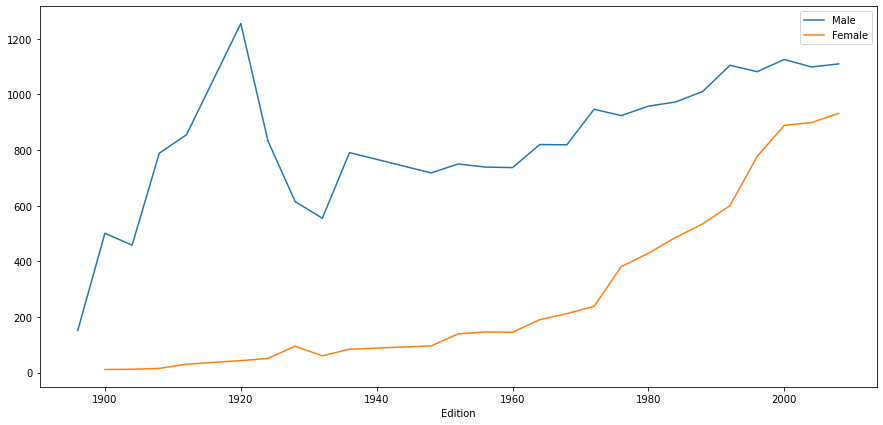

In [21]:
Men_by_Year = medals[medals.Gender== 'Men'].groupby('Edition').agg('count').Athlete
women_by_Year = medals[medals.Gender=='Women'].groupby('Edition').agg('count').Athlete
Dataframe=pd.merge(Men_by_Year,women_by_Year,how='outer',on='Edition')
df=Dataframe.rename(columns={'Athlete_x' : 'Male', 'Athlete_y' : 'Female'})
Dataframe1= df.reset_index().set_index('Edition')
Dataframe1.plot.line(figsize=(15,7))

In [22]:
import sweetviz as sv

In [23]:
olymp_report=sv.analyze(medals)

:FEATURES DONE:                    |                     | [  0%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!


In [24]:
olymp_report.show_html('medals.html')